In [2]:
import numpy as np
import pandas as pd
%matplotlib inline 
import bamboolib
import plotly.express as px
import seaborn as sns

In [167]:
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import datasets

In [3]:
#Reading the Datasets
#House_price dataset
housing_price = pd.read_csv('Ames_HousePrice.csv', index_col=0)
housing_price.shape

(2580, 81)

In [4]:
#Reading the train and test dataset (the dataset was broken into test and train and saved as csv for every group member)
train_housing = pd.read_csv('train_housing.csv', index_col=0)
test_housing = pd.read_csv('test_housing.csv', index_col=0)
train_housing.shape

(2064, 81)

In [5]:
test_housing.shape

(516, 81)

There are 2064 rows and 81 columns in the train dataset and 516 rows in test dataset

In [6]:
#looking at the columns and null values
train_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 754 to 136
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            2064 non-null   int64  
 1   GrLivArea      2064 non-null   int64  
 2   SalePrice      2064 non-null   int64  
 3   MSSubClass     2064 non-null   int64  
 4   MSZoning       2064 non-null   object 
 5   LotFrontage    1690 non-null   float64
 6   LotArea        2064 non-null   int64  
 7   Street         2064 non-null   object 
 8   Alley          130 non-null    object 
 9   LotShape       2064 non-null   object 
 10  LandContour    2064 non-null   object 
 11  Utilities      2064 non-null   object 
 12  LotConfig      2064 non-null   object 
 13  LandSlope      2064 non-null   object 
 14  Neighborhood   2064 non-null   object 
 15  Condition1     2064 non-null   object 
 16  Condition2     2064 non-null   object 
 17  BldgType       2064 non-null   object 
 18  HouseSt

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

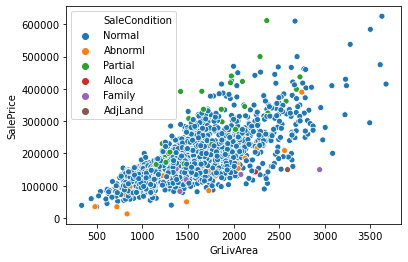

In [7]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='SaleCondition')
#Most of my dataset contains normal sale so I will look at normal sales only

In [8]:
train_housing['SaleCondition'].value_counts()

Normal     1939
Partial      59
Abnorml      47
Family       14
Alloca        3
AdjLand       2
Name: SaleCondition, dtype: int64

In [9]:
#I will analyze the normal sales only and drop all rows containing other types of sale
train_housing =train_housing[train_housing['SaleCondition']=='Normal']
train_housing.shape

(1939, 81)

In [10]:
train_housing['MSZoning'].value_counts()

RL         1525
RM          311
FV           75
RH           15
C (all)      10
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64

In [11]:
#I will remove FV, C,I and A
train_housing=train_housing.loc[~train_housing.MSZoning.isin(['C (all)','I (all)','A (agr)','FV'])]

In [12]:
train_housing['MSZoning'].value_counts()

RL    1525
RM     311
RH      15
Name: MSZoning, dtype: int64

# Kept Normal Sales(SaleCondition) and Residential Type (MSZoning)

In [13]:
nan_values = train_housing.isna()
nan_columns = nan_values.any()
null_list = train_housing.columns[nan_columns].tolist()

In [14]:
null_list

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

The features with null values are related to Alley, Masonry veneer type, Basement, Fireplace,Garage, Pool, fence and MiscFeatures

In [15]:
#I will look at the unique values of each of these features

In [16]:
#Lotfrontage is Linear feet of street connected to property
train_housing['LotFrontage'].value_counts()

60.0     179
70.0      97
80.0      91
50.0      87
75.0      64
        ... 
138.0      1
141.0      1
140.0      1
126.0      1
104.0      1
Name: LotFrontage, Length: 117, dtype: int64

In [17]:
lotfrontage_null = train_housing[train_housing['LotFrontage'].isna()]
lotfrontage_null

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
746,906223140,2200,225000,60,RL,NaN,14171,Pave,NaN,IR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
684,534252090,999,178400,85,RL,NaN,12122,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
541,532353050,912,144000,20,RL,NaN,12968,Pave,NaN,IR2,...,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal
387,909279080,1991,220000,50,RL,NaN,11275,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal
875,527325160,2263,235000,60,RL,NaN,16659,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,3,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,534250335,1670,170000,60,RL,NaN,13355,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
85,909452102,1680,170000,20,RL,NaN,17871,Pave,NaN,IR2,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1000,914452120,912,156000,85,RL,NaN,7540,Pave,NaN,IR1,...,192,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
878,531384070,1820,191750,60,RL,NaN,11613,Pave,NaN,IR2,...,0,0,NaN,GdPrv,NaN,0,5,2007,WD,Normal


In [18]:
#It is not clear which houses have no lot frontage, I will convert the NA to 0 and see if it has any effect on sale price 
#for similar size homes
train_lot = train_housing
train_lot['LotFrontage'] =train_lot['LotFrontage'].fillna(0)


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

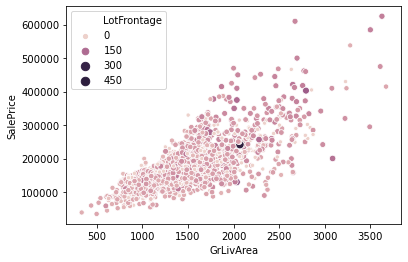

In [19]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='LotFrontage',size='LotFrontage')
#Looks like lot frontage does not have a very high effect on sales price, so I can drop the feature

In [20]:
train_housing = train_housing.drop(['LotFrontage'], axis=1)

# Dropped LotFrontage : No effect on sale price and many houses have nulls

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

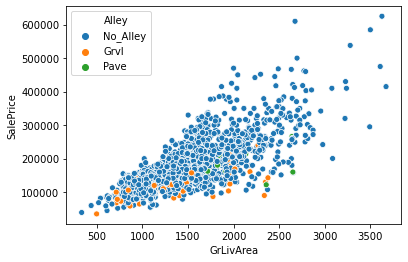

In [21]:
#Alley
#Does alley adds to the price
#I will first convert nas to no_alley
train_housing["Alley"]=train_housing["Alley"].fillna("No_Alley")
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='Alley')
#Having a pavement alley definitely adds value to the house

In general houses with pave alley are higher priced than no Gravel alley and there are 130 houses in my dataset that supports this with very few outliers, The alley with null value means does not have alley, I will convert the null alley to another categorical variable, no_alley

# Paved alley are generally higher priced than gravel alley, changed nulls to no_alley

In [22]:
#'MasVnrType' and 'MasVnrArea'
train_housing['MasVnrType'].value_counts()

None       1136
BrkFace     576
Stone       118
BrkCmn       15
Name: MasVnrType, dtype: int64

In [23]:
train_housing['MasVnrArea'].value_counts()

0.0      1131
120.0       9
132.0       8
108.0       8
176.0       8
         ... 
406.0       1
402.0       1
400.0       1
634.0       1
415.0       1
Name: MasVnrArea, Length: 347, dtype: int64

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

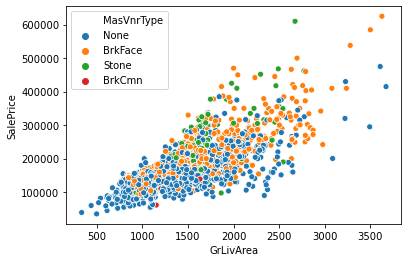

In [24]:
#Most data does not have a value, I will look if one material is more expensive than other
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='MasVnrType')
#The graph below is'nt telling much about it and due to partial information I will drop those two features as well

In [25]:
train_housing = train_housing.drop(['MasVnrType',], axis=1)

# Dropped MasVnrType, it wasnt effecting the sales price much

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

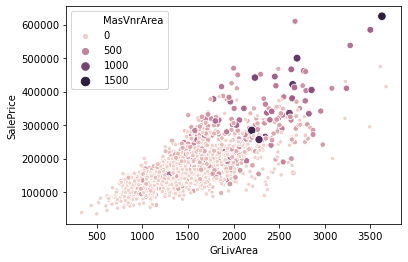

In [26]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='MasVnrArea',size='MasVnrArea')
#Larger houses have larger veneer area

In [27]:
#I will check if mason veneer area is correlated to overall living area
train_housing['MasVnrArea'].corr(train_housing['GrLivArea'])
#It is loosely correlated and due to lot of missing values, I will drop this feature too

0.38338435113741665

In [28]:
train_housing = train_housing.drop(['MasVnrArea',], axis=1)

# Dropped MasVnrArea, it was loosely correlated with GrLivArea

Missing value in basement may imply no basement, so i can convert all nas in basement feature as 0 or not present

In [29]:
Base_features =['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2',
                'BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']

In [30]:
#Checking the values in each of basement feature
for i in Base_features:
    print(i)
    y = train_housing[i].value_counts()
    print(y)   

BsmtQual
TA    908
Gd    725
Ex    114
Fa     55
Name: BsmtQual, dtype: int64
BsmtCond
TA    1659
Gd      72
Fa      65
Ex       3
Po       3
Name: BsmtCond, dtype: int64
BsmtExposure
No    1215
Av     251
Gd     178
Mn     157
Name: BsmtExposure, dtype: int64
BsmtFinType1
GLQ    500
Unf    481
ALQ    302
Rec    214
BLQ    196
LwQ    109
Name: BsmtFinType1, dtype: int64
BsmtFinSF1
0.0       530
24.0       12
16.0        7
288.0       7
20.0        7
         ... 
987.0       1
586.0       1
1096.0      1
867.0       1
415.0       1
Name: BsmtFinSF1, Length: 773, dtype: int64
BsmtFinType2
Unf    1548
Rec      71
LwQ      64
BLQ      52
ALQ      39
GLQ      27
Name: BsmtFinType2, dtype: int64
BsmtFinSF2
0.0      1598
294.0       4
147.0       3
483.0       3
144.0       3
         ... 
875.0       1
873.0       1
448.0       1
497.0       1
38.0        1
Name: BsmtFinSF2, Length: 215, dtype: int64
BsmtUnfSF
0.0       158
384.0      17
816.0       8
300.0       8
572.0       8
         ..

In [31]:
#Checking for null values, among the categorical features NAs imply no basements
for i in Base_features:
    print(i)
    sum = train_housing[i].isna().sum() 
    print(sum)
#I will look at the row that has NA for the continuous variable (instead of zero)

BsmtQual
49
BsmtCond
49
BsmtExposure
50
BsmtFinType1
49
BsmtFinSF1
0
BsmtFinType2
50
BsmtFinSF2
0
BsmtUnfSF
0
TotalBsmtSF
0
BsmtFullBath
0
BsmtHalfBath
0


In [32]:
#There is 1 row with NA in last few features
print(train_housing.loc[pd.isna(train_housing["BsmtQual"]), :].index)
print(train_housing.loc[pd.isna(train_housing["BsmtCond"]), :].index)
print(train_housing.loc[pd.isna(train_housing["BsmtExposure"]), :].index)
print(train_housing.loc[pd.isna(train_housing["BsmtFinType1"]), :].index)
print(train_housing.loc[pd.isna(train_housing["BsmtFinType2"]), :].index)

Int64Index([165, 450, 192, 128, 744, 388, 237,   8, 368,  38, 648,   6, 756,
            398,  90, 608, 165, 742, 609,  20, 496, 553, 337, 591, 684, 309,
            800, 775, 918, 679, 393, 194, 301, 479, 329, 555, 271, 279, 545,
             65, 576, 905, 620, 160, 555, 284, 487, 295,  89],
           dtype='int64')
Int64Index([165, 450, 192, 128, 744, 388, 237,   8, 368,  38, 648,   6, 756,
            398,  90, 608, 165, 742, 609,  20, 496, 553, 337, 591, 684, 309,
            800, 775, 918, 679, 393, 194, 301, 479, 329, 555, 271, 279, 545,
             65, 576, 905, 620, 160, 555, 284, 487, 295,  89],
           dtype='int64')
Int64Index([165, 450, 192, 128, 744, 388, 237,   8, 368,  38, 648,   6, 756,
            398,  90, 608, 165, 742, 609,  20, 496, 553, 337, 591, 684, 309,
            800, 775, 918, 679, 393, 194, 301, 479, 329, 555, 271, 279, 545,
             65, 576, 905, 620, 160, 555, 284, 202, 487, 295,  89],
           dtype='int64')
Int64Index([165, 450, 192, 128, 744

In [33]:
#I will change the nan for comntinuous variables to 0 and categoric variable to no_basement
train_housing["BsmtQual"]=train_housing["BsmtQual"].fillna("No_basement")
train_housing["BsmtCond"]=train_housing["BsmtCond"].fillna("No_basement")
train_housing["BsmtExposure"]=train_housing["BsmtExposure"].fillna("No_basement")
train_housing["BsmtFinType1"]=train_housing["BsmtFinType1"].fillna(0)
train_housing["BsmtFinType2"]=train_housing["BsmtFinType2"].fillna(0)

# Change null for categorical features (Basement) to no_basement and continuous variables to 0

In [34]:
for i in Base_features:
    print(i)
    sum = train_housing[i].isna().sum() 
    print(sum)
#All the basement related null values are taken care of

BsmtQual
0
BsmtCond
0
BsmtExposure
0
BsmtFinType1
0
BsmtFinSF1
0
BsmtFinType2
0
BsmtFinSF2
0
BsmtUnfSF
0
TotalBsmtSF
0
BsmtFullBath
0
BsmtHalfBath
0


In [35]:
#FireplaceQu
train_housing['FireplaceQu'].isna().sum() 

882

In [36]:
#There are 931 houses with no fireplace, I will replace them with 'no_fireplace' too
train_housing["FireplaceQu"]=train_housing["FireplaceQu"].fillna("No_Fireplace")

# 882 houses did not have fireplace, changed null values to no_fireplace

In [37]:
#'GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'
garage_features = ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']

In [38]:
for i in garage_features:
    print(i)
    sum = train_housing[i].isna().sum() 
    print(sum)

GarageType
90
GarageYrBlt
90
GarageFinish
90
GarageQual
90
GarageCond
90


In [39]:
#92 houses do not have garage
#Checking the values in each of garage features
for i in garage_features:
    print(i)
    y = train_housing[i].value_counts()
    print(y)  

GarageType
Attchd     1101
Detchd      509
BuiltIn     111
Basment      16
2Types       16
CarPort       8
Name: GarageType, dtype: int64
GarageYrBlt
2005.0    66
2004.0    63
2003.0    60
1977.0    46
1998.0    39
          ..
1908.0     1
1931.0     1
1914.0     1
1943.0     1
1918.0     1
Name: GarageYrBlt, Length: 98, dtype: int64
GarageFinish
Unf    830
RFn    509
Fin    422
Name: GarageFinish, dtype: int64
GarageQual
TA    1657
Fa      83
Gd      17
Ex       3
Po       1
Name: GarageQual, dtype: int64
GarageCond
TA    1689
Fa      52
Gd      11
Po       6
Ex       3
Name: GarageCond, dtype: int64


In [40]:
#First and Last 4 are categoric variable, we can drop garage year built feature since in most cases age of house will
#determine the saleprice than age of garage
train_housing = train_housing.drop(['GarageYrBlt',], axis=1)

# Dropped garage year built since in most houses house year = garage year

In [41]:
#Replacing null of all other categorical variable by no_garage
garage_new_features = ['GarageType','GarageFinish','GarageQual','GarageCond']
for i in garage_new_features:
    train_housing[i]=train_housing[i].fillna("No_garage")

In [42]:
for i in garage_new_features:
    print(i)
    sum = train_housing[i].isna().sum() 
    print(sum)

GarageType
0
GarageFinish
0
GarageQual
0
GarageCond
0


# Replace nulls in garage features (categorical) to no_garage

In [43]:
#Pool, Fence and MiscFeatures

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

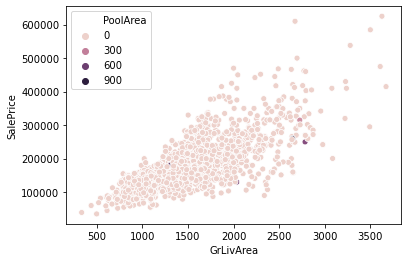

In [44]:
#Pool
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='PoolArea')

In [45]:
#Very few houses have pools, so we decided to drop those rows and drop the pool related column
train_housing =train_housing[train_housing['PoolArea']==0]
train_housing = train_housing.drop(['PoolArea', 'PoolQC'], axis=1)
train_housing.shape

(1844, 75)

# Dropped all houses with pool (only 9 houses)

In general houses with pave alley are higher priced than no Gravel alley and there are 130 houses in my dataset that supports this with very few outliers, The alley with null value means does not have alley, I will convert the null alley to another categorical variable, no_alley

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

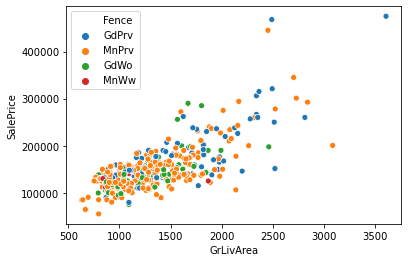

In [46]:
#Fence
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='Fence')

In [47]:
#There are 426 houses with fence, most of the houses above 2000 sqft have good-min privacy and houses with good privacy 
#are in general costlier. I will compare fence vrs no fence
train_housing["Fence"]=train_housing["Fence"].fillna("No_Fence")


# Changed null values in fence to no_fence, good to min privacy are in general costlier so I decided to keep this feature

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

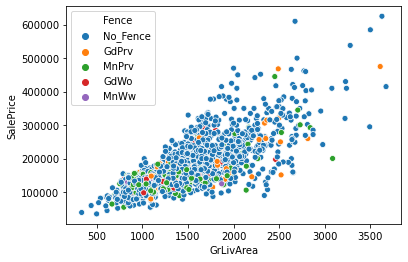

In [48]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='Fence')

Houses with fence are concentrared in between with higher price for good privacy fences among all other fences

In [49]:
#Misc Features
train_housing['MiscFeature'].value_counts()

Shed    63
Gar2     3
Othr     3
Name: MiscFeature, dtype: int64

In [50]:
#Changing the null values into no_misc
train_housing["MiscFeature"]=train_housing["MiscFeature"].fillna("No_MiscFeature")

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

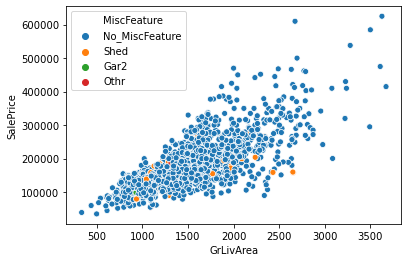

In [51]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='MiscFeature')

In [52]:
#A Shed and second garage is definitely adding value to the house but we have very few data(3) with second garage,
#so I will drop the second garage feature and row. The effect of other feature is not known and since there are just 3 
#datapoints, I will drop the houses with second garage and othr features
train_housing =train_housing[train_housing['MiscFeature']!='Gar2']
train_housing =train_housing[train_housing['MiscFeature']!='Othr']


# Among miscfeatures shed added value to houses, there were 3 houses with 2nd garage and othr misc feature, so I dropped these three rows

In [53]:
train_housing.to_csv('train_housing_dropnull.csv')

In [54]:
#Looking at the quality and condition data
price        = train_housing['SalePrice']
quality_condition = train_housing.filter(regex='Qual$|Cond$|Qu|QC')
quality_condition.head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,LowQualFinSF,KitchenQual,FireplaceQu,GarageQual,GarageCond
754,5,5,TA,TA,TA,TA,Ex,0,TA,No_Fireplace,TA,TA
404,6,5,TA,TA,TA,TA,TA,0,TA,Gd,TA,TA
538,7,6,TA,TA,TA,TA,Gd,0,TA,No_Fireplace,TA,TA
777,7,5,TA,TA,Gd,TA,Ex,0,TA,No_Fireplace,TA,TA
726,5,5,TA,TA,TA,TA,TA,0,TA,Fa,TA,TA


In [55]:
#I will drop LowQualFinSF from quality_condition
quality_condition= quality_condition.drop(columns =['LowQualFinSF'])

In [56]:
#I will do label encoding to see which part of the house effects the overall quality and overall conditions
#creating a label map
lab_ord_map = {'Po': 1, 'Fa': 2, 'TA': 3, 
               'Gd': 4, 'Ex': 5}

In [57]:
#The possible cases can be
#1. house with no garage
#2. houses with no basement
#3. houses with no fireplace

In [58]:
#How many houses do not have a garage
quality_condition['GarageQual'].value_counts()
#There are 101 houses with no garage

TA           1646
No_garage      89
Fa             83
Gd             16
Ex              3
Po              1
Name: GarageQual, dtype: int64

In [59]:
#How many houses do not have a basement
quality_condition['BsmtQual'].value_counts()
#There are 51 houses with no basement

TA             901
Gd             721
Ex             114
Fa              55
No_basement     47
Name: BsmtQual, dtype: int64

In [60]:
quality_condition.replace({'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}},inplace=True)
quality_condition.replace({'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}},inplace=True)
quality_condition.replace({'BsmtQual': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5,'No_basement': 0}},inplace=True)
quality_condition.replace({'BsmtCond': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5,'No_basement': 0}},inplace=True)
quality_condition.replace({'FireplaceQu': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5,'No_Fireplace': 0}},inplace=True)
quality_condition.replace({'GarageQual': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5,'No_garage': 0}},inplace=True)
quality_condition.replace({'GarageCond': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5,'No_garage': 0}},inplace=True)
quality_condition.replace({'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}},inplace=True)
quality_condition.replace({'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}},inplace=True)


In [61]:
quality = quality_condition[['OverallQual','ExterQual','FireplaceQu','BsmtQual','GarageQual','HeatingQC','KitchenQual']]


In [62]:
data_qual = quality.melt(id_vars=['OverallQual'], var_name='dataset', value_name='values')

<AxesSubplot:xlabel='ExterQual', ylabel='OverallQual'>

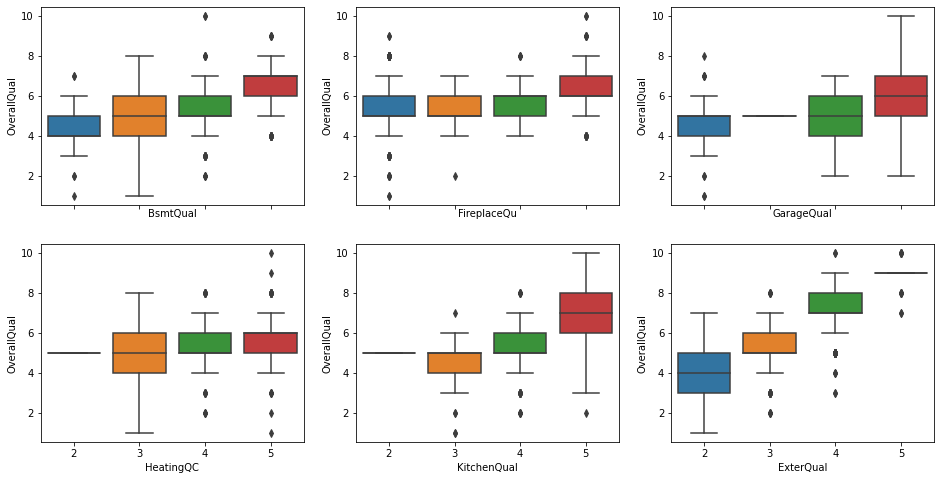

In [63]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))
sns.boxplot(x='BsmtQual', y="OverallQual", data=quality_condition,ax=axes[0, 0])
sns.boxplot(x='FireplaceQu', y="OverallQual", data=quality_condition,ax=axes[0, 1])
sns.boxplot(x='GarageQual', y="OverallQual", data=quality_condition,ax=axes[0, 2])
sns.boxplot(x='HeatingQC', y="OverallQual", data=quality_condition,ax=axes[1, 0])
sns.boxplot(x='KitchenQual', y="OverallQual", data=quality_condition,ax=axes[1, 1])
sns.boxplot(x='ExterQual', y="OverallQual", data=quality_condition,ax=axes[1, 2])

In [64]:
quality_condition.columns

Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
       'GarageCond'],
      dtype='object')

<AxesSubplot:xlabel='HeatingQC', ylabel='OverallCond'>

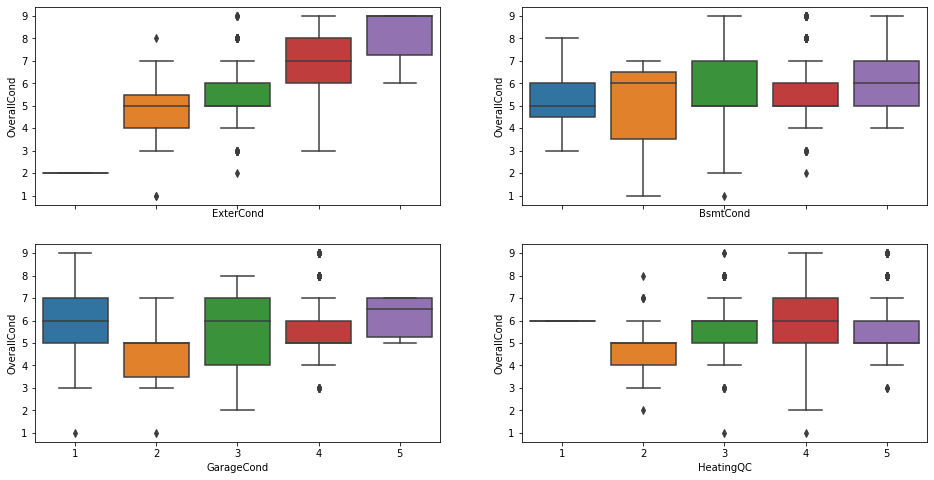

In [65]:
#Looking at the condition
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,8))
sns.boxplot(x='ExterCond', y="OverallCond", data=quality_condition,ax=axes[0, 0])
sns.boxplot(x='BsmtCond', y="OverallCond", data=quality_condition,ax=axes[0, 1])
sns.boxplot(x='GarageCond', y="OverallCond", data=quality_condition,ax=axes[1, 0])
sns.boxplot(x='HeatingQC', y="OverallCond", data=quality_condition,ax=axes[1, 1])

From the boxplots above, external quality and kitchen quality has maximum impact on the overall quality
External Condition has maximum impact on overall condition
So, for a house to be rated high in terms of quality and condition it is very important to keep the external quality
and condition in good state and kitchen quality too
I can drop the external quantity and external condition and kitchen condition row as overall quality and condition are good indicators of these three features

# Extqual, ExtCond and KitchenCond effected overall quality and condition so I dropped these three features 

In [66]:
train_housing = train_housing.drop(['ExterCond','ExterQual','KitchenQual'], axis=1)

In [67]:
train_housing.shape

(1838, 72)

In [68]:
#I will see if the other features influence sale price
train_housing

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
754,905102170,1040,129500,20,RL,11200,Pave,No_Alley,Reg,Lvl,...,0,0,0,No_Fence,No_MiscFeature,0,2,2008,WD,Normal
404,903234160,986,102000,30,RM,6180,Pave,No_Alley,Reg,Lvl,...,0,0,0,No_Fence,No_MiscFeature,0,5,2007,WD,Normal
538,903425110,1710,140000,70,RM,10300,Pave,No_Alley,IR1,Bnk,...,64,0,0,GdPrv,No_MiscFeature,0,4,2010,WD,Normal
777,907131190,1463,207000,20,RL,14753,Pave,No_Alley,IR2,Low,...,0,0,0,GdPrv,No_MiscFeature,0,12,2009,WD,Normal
726,905104210,912,125000,20,RL,8521,Pave,No_Alley,Reg,Lvl,...,0,0,0,MnPrv,No_MiscFeature,0,5,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,534431130,960,122000,20,RL,9768,Pave,No_Alley,Reg,Lvl,...,0,0,0,MnPrv,No_MiscFeature,0,2,2009,WD,Normal
738,528250040,1342,178000,60,RL,8174,Pave,No_Alley,IR1,Lvl,...,0,0,0,No_Fence,No_MiscFeature,0,5,2009,WD,Normal
294,535151160,1283,140000,20,RL,7763,Pave,No_Alley,Reg,Lvl,...,0,0,0,No_Fence,No_MiscFeature,0,10,2008,WD,Normal
738,534426110,1041,124500,20,RL,9600,Pave,No_Alley,Reg,Lvl,...,0,0,0,MnPrv,No_MiscFeature,0,7,2009,WD,Normal


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

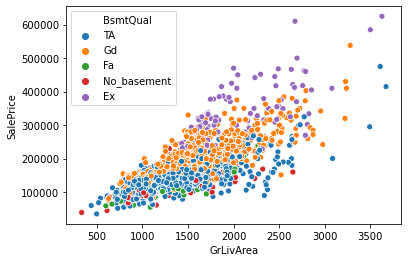

In [69]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='BsmtQual')
#Bsmnt Quality has effect on sales price of same sized houses

# Good and Excellent Basement Condition added value to the saleprice so I kept the feature

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

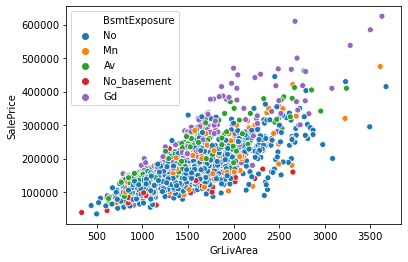

In [70]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='BsmtExposure')
#There is no visible  pattern for basement exposure

# There is no pattern seen on price with basement exposure, so I dropped it

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

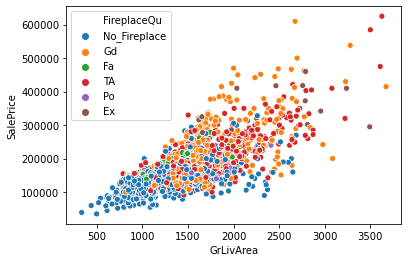

In [71]:
# fig = px.scatter(train_housing, x='GrLivArea', y='SalePrice', color='FireplaceQu')
# fig
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='FireplaceQu')
#No visible pattern is seen for fireplace and most houses do not have fireplace too

# Many houses do not have fireplace anrd there is no visible effect of fireplacequality, so I dropped that too

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

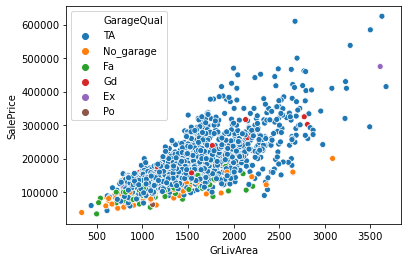

In [72]:
# fig = px.scatter(train_housing, x='GrLivArea', y='SalePrice', color='GarageQual')
# fig
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='GarageQual')
#Most garages have fair to typical rating and  does not effect much

# Most garages have fair and typical rating  and the rating does not effect the saleprice a lot so dropped that too

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

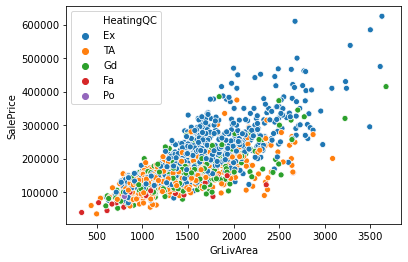

In [73]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='HeatingQC')
#Bigger houses with excellent heating are higher priced

# Bigger houses with excellent heating are higher priced so i kept the heating quality

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

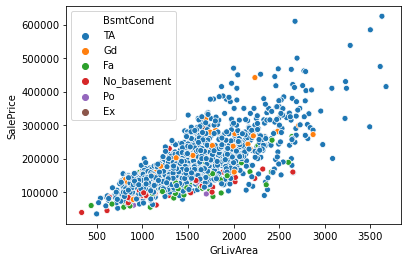

In [74]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='BsmtCond')
#Not much is seen of Bsmnt condition

In [75]:
#I will drop 'BsmtCond','GarageQual','FireplaceQu','BsmtExposure'
train_housing=train_housing.drop(['BsmtCond','GarageQual','FireplaceQu','BsmtExposure'],axis =1)

In [76]:
train_housing.shape

(1838, 68)

# # Neighborhood Analysis

In [77]:
train_housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType'

In [118]:
train_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838 entries, 905102170 to 531451150
Data columns (total 67 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   GrLivArea      1838 non-null   int64  
 1   SalePrice      1838 non-null   int64  
 2   MSSubClass     1838 non-null   int64  
 3   MSZoning       1838 non-null   object 
 4   LotArea        1838 non-null   int64  
 5   Street         1838 non-null   object 
 6   Alley          1838 non-null   object 
 7   LotShape       1838 non-null   object 
 8   LandContour    1838 non-null   object 
 9   Utilities      1838 non-null   object 
 10  LotConfig      1838 non-null   object 
 11  LandSlope      1838 non-null   object 
 12  Neighborhood   1838 non-null   object 
 13  Condition1     1838 non-null   object 
 14  Condition2     1838 non-null   object 
 15  BldgType       1838 non-null   object 
 16  HouseStyle     1838 non-null   object 
 17  OverallQual    1838 non-null   int64  


In [119]:
train_housing['MiscVal']

PID
905102170    0
903234160    0
903425110    0
907131190    0
905104210    0
            ..
534431130    0
528250040    0
535151160    0
534426110    0
531451150    0
Name: MiscVal, Length: 1838, dtype: int64

In [79]:
train_housing.groupby('Neighborhood')['GrLivArea','SalePrice'].mean().sort_values('SalePrice')
#There are 28 neighborhoods

,GrLivArea,SalePrice
Neighborhood,,
MeadowV,1056.826087,90382.173913
BrDale,1121.190476,109021.428571
IDOTRR,1270.085106,118133.595745
BrkSide,1264.026316,127579.934211
Edwards,1288.551181,128201.181102
OldTown,1429.152439,128587.548780
SWISU,1531.516129,134298.387097
Landmrk,1320.000000,137000.000000
Sawyer,1179.588235,137761.029412


# NoRidge has the biggest houses and GrnHill has the most price/sqft

In [80]:
#NoRidge Neigborhood has the largest average size houses and has highest average price too
#GrnHill has very high square ft price

In [85]:
Neigborhood_housing =train_housing.groupby('Neighborhood')['BldgType'].value_counts()
Neigborhood_housing 

Neighborhood  BldgType
Blmngtn       TwnhsE      12
Blueste       Twnhs        5
              TwnhsE       4
BrDale        Twnhs       17
              TwnhsE       4
                          ..
Timber        1Fam        40
              2fmCon       1
              TwnhsE       1
Veenker       1Fam        15
              TwnhsE       3
Name: BldgType, Length: 68, dtype: int64

In [91]:
#To keep all the dummified features in both test and train, I will drop the features from entire dataset and split based
#on feature engineered train-test using PID
housing_data = pd.read_csv('housing_data.csv')


In [97]:
housing_data

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,7890,Pave,No_Alley,Reg,...,0,0,166,No_Fence,No_MiscFeature,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,4235,Pave,No_Alley,Reg,...,0,0,0,No_Fence,No_MiscFeature,0,2,2009,WD,Normal
2,4,535377150,1039,114000,70,RL,8146,Pave,No_Alley,Reg,...,168,0,111,No_Fence,No_MiscFeature,0,5,2009,WD,Normal
3,5,534177230,1665,227000,60,RL,8400,Pave,No_Alley,Reg,...,0,0,0,No_Fence,No_MiscFeature,0,11,2009,WD,Normal
4,6,908128060,1922,198500,85,RL,7301,Pave,No_Alley,Reg,...,177,0,0,No_Fence,No_MiscFeature,0,7,2009,ConLD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,759,903205040,952,121000,30,RL,8854,Pave,No_Alley,Reg,...,0,0,40,No_Fence,No_MiscFeature,0,5,2009,WD,Normal
2285,760,905402060,1733,139600,20,RL,13680,Pave,No_Alley,IR1,...,0,0,0,No_Fence,No_MiscFeature,0,6,2009,WD,Normal
2286,761,909275030,2002,145000,90,RH,6270,Pave,No_Alley,Reg,...,0,0,0,No_Fence,No_MiscFeature,0,8,2007,WD,Normal
2287,762,907192040,1842,217500,60,RL,8826,Pave,No_Alley,Reg,...,0,0,0,No_Fence,No_MiscFeature,0,7,2007,WD,Normal


In [133]:
housing_data=housing_data.drop(['Unnamed: 0'], axis=1)
housing_data

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,909176150,856,126000,30,RL,7890,Pave,No_Alley,Reg,Lvl,...,0,0,166,No_Fence,No_MiscFeature,0,3,2010,WD,Normal
1,905476230,1049,139500,120,RL,4235,Pave,No_Alley,Reg,Lvl,...,0,0,0,No_Fence,No_MiscFeature,0,2,2009,WD,Normal
2,535377150,1039,114000,70,RL,8146,Pave,No_Alley,Reg,Lvl,...,168,0,111,No_Fence,No_MiscFeature,0,5,2009,WD,Normal
3,534177230,1665,227000,60,RL,8400,Pave,No_Alley,Reg,Lvl,...,0,0,0,No_Fence,No_MiscFeature,0,11,2009,WD,Normal
4,908128060,1922,198500,85,RL,7301,Pave,No_Alley,Reg,Lvl,...,177,0,0,No_Fence,No_MiscFeature,0,7,2009,ConLD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,903205040,952,121000,30,RL,8854,Pave,No_Alley,Reg,Lvl,...,0,0,40,No_Fence,No_MiscFeature,0,5,2009,WD,Normal
2285,905402060,1733,139600,20,RL,13680,Pave,No_Alley,IR1,Lvl,...,0,0,0,No_Fence,No_MiscFeature,0,6,2009,WD,Normal
2286,909275030,2002,145000,90,RH,6270,Pave,No_Alley,Reg,HLS,...,0,0,0,No_Fence,No_MiscFeature,0,8,2007,WD,Normal
2287,907192040,1842,217500,60,RL,8826,Pave,No_Alley,Reg,Lvl,...,0,0,0,No_Fence,No_MiscFeature,0,7,2007,WD,Normal


In [137]:
housing_data["MSSubClass"]

0        30
1       120
2        70
3        60
4        85
       ... 
2284     30
2285     20
2286     90
2287     60
2288     60
Name: MSSubClass, Length: 2289, dtype: int64

In [138]:
housing_data[["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","YrSold"]]=housing_data[["MSSubClass","OverallQual",
                                                                                                           "OverallCond","YearBuilt","YearRemodAdd","YrSold"]].astype('category')



In [140]:
housing_dummy =pd.get_dummies(housing_data)

In [141]:
housing_dummy = housing_dummy.reset_index()
housing_dummy

,index,PID,GrLivArea,SalePrice,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal
0,0,909176150,856,126000,7890,238.0,0.0,618.0,856.0,856,...,0,0,0,0,0,0,0,0,1,1
1,1,905476230,1049,139500,4235,552.0,393.0,104.0,1049.0,1049,...,0,0,0,0,0,0,0,0,1,1
2,2,535377150,1039,114000,8146,0.0,0.0,405.0,405.0,717,...,0,0,0,0,0,0,0,0,1,1
3,3,534177230,1665,227000,8400,643.0,0.0,167.0,810.0,810,...,0,0,0,0,0,0,0,0,1,1
4,4,908128060,1922,198500,7301,0.0,0.0,0.0,0.0,495,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2284,2284,903205040,952,121000,8854,0.0,0.0,952.0,952.0,952,...,0,0,0,0,0,0,0,0,1,1
2285,2285,905402060,1733,139600,13680,0.0,0.0,0.0,0.0,1733,...,0,0,0,0,0,0,0,0,1,1
2286,2286,909275030,2002,145000,6270,284.0,0.0,717.0,1001.0,1001,...,0,0,0,0,0,0,0,0,1,1
2287,2287,907192040,1842,217500,8826,841.0,0.0,144.0,985.0,985,...,0,0,0,0,0,0,0,0,1,1


In [145]:
housing_dummy=housing_dummy.drop(['index'], axis=1)

In [143]:
housing_dummy=housing_dummy.set_index('PID')

In [144]:
housing_dummy = housing_dummy.reset_index()
housing_dummy

,index,GrLivArea,SalePrice,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal
PID,,,,,,,,,,,,,,,,,,,,,
909176150,0,856,126000,7890,238.0,0.0,618.0,856.0,856,0,...,0,0,0,0,0,0,0,0,1,1
905476230,1,1049,139500,4235,552.0,393.0,104.0,1049.0,1049,0,...,0,0,0,0,0,0,0,0,1,1
535377150,2,1039,114000,8146,0.0,0.0,405.0,405.0,717,322,...,0,0,0,0,0,0,0,0,1,1
534177230,3,1665,227000,8400,643.0,0.0,167.0,810.0,810,855,...,0,0,0,0,0,0,0,0,1,1
908128060,4,1922,198500,7301,0.0,0.0,0.0,0.0,495,1427,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903205040,2284,952,121000,8854,0.0,0.0,952.0,952.0,952,0,...,0,0,0,0,0,0,0,0,1,1
905402060,2285,1733,139600,13680,0.0,0.0,0.0,0.0,1733,0,...,0,0,0,0,0,0,0,0,1,1
909275030,2286,2002,145000,6270,284.0,0.0,717.0,1001.0,1001,1001,...,0,0,0,0,0,0,0,0,1,1


In [149]:
train_housing=train_housing.set_index('PID')

In [151]:
test_housing = test_housing.reset_index()
test_housing

,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
PID,,,,,,,,,,,,,,,,,,,,,
531452020,918,99500,120,RL,55.0,7892,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
908204160,1152,82500,90,RL,74.0,6845,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal
909179020,3082,197000,75,RL,102.0,15863,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
911104060,572,75000,30,C (all),60.0,10200,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal
907280170,1417,210000,20,RL,70.0,8750,Pave,NaN,Reg,Lvl,...,117,0,NaN,NaN,NaN,0,8,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905104030,913,129000,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
527451290,987,85400,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,7,2008,COD,Abnorml
907192130,1494,221000,20,RL,88.0,12803,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal


In [152]:
train_final = housing_dummy[housing_dummy.index.isin(train_housing.index)]

In [153]:
test_final = housing_dummy[housing_dummy.index.isin(test_housing.index)]

In [154]:
train_final.shape

(1838, 454)

In [155]:
test_final.shape

(451, 454)

In [156]:
#Reading to csv
train_final.to_csv('train_final.csv')
test_final.to_csv('test_final.csv')

In [160]:
train_final=train_final.reset_index()

In [162]:
test_final=test_final.reset_index()

In [164]:
#train_x, train_y
y_train = train_final['SalePrice']
X_train = train_final.drop(['SalePrice','PID'], axis=1)

In [165]:
#test_x, test_y
y_test = test_final['SalePrice']
X_test = test_final.drop(['SalePrice','PID'], axis=1)

In [170]:
X_test.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Columns: 453 entries, GrLivArea to SaleCondition_Normal
dtypes: float64(8), int64(18), uint8(427)
memory usage: 279.8 KB


In [173]:
X_train[:] = np.nan_to_num(X_train)

In [174]:
X_test[:] = np.nan_to_num(X_test)

In [175]:
lasso  = Lasso()
alphas = np.linspace(0.7,40.7,41)
lasso.set_params(normalize=True)
coefs_lasso  = []

for alpha in alphas:
        lasso.set_params(alpha=alpha, normalize=True)
        lasso.fit(X_train, y_train)  
        
        coefs_lasso.append(lasso.coef_)
        print('Accuracy of lasso with lambda {:.2f} on train set: {:.2f}'.format(alpha, lasso.score(X_train, y_train)))
        print('Accuracy of lasso on train set: {:.2f}'.format(lasso.score(X_test, y_test)))



coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas, columns = X_train.columns)  
coefs_lasso = coefs_lasso.reset_index()
coefs_lasso

Accuracy of lasso with lambda 0.70 on train set: 0.96
Accuracy of lasso on train set: 0.92
Accuracy of lasso with lambda 1.70 on train set: 0.96
Accuracy of lasso on train set: 0.92
Accuracy of lasso with lambda 2.70 on train set: 0.96
Accuracy of lasso on train set: 0.92
Accuracy of lasso with lambda 3.70 on train set: 0.96
Accuracy of lasso on train set: 0.92
Accuracy of lasso with lambda 4.70 on train set: 0.96
Accuracy of lasso on train set: 0.92
Accuracy of lasso with lambda 5.70 on train set: 0.96
Accuracy of lasso on train set: 0.92
Accuracy of lasso with lambda 6.70 on train set: 0.95
Accuracy of lasso on train set: 0.92
Accuracy of lasso with lambda 7.70 on train set: 0.95
Accuracy of lasso on train set: 0.92
Accuracy of lasso with lambda 8.70 on train set: 0.95
Accuracy of lasso on train set: 0.92
Accuracy of lasso with lambda 9.70 on train set: 0.95
Accuracy of lasso on train set: 0.92
Accuracy of lasso with lambda 10.70 on train set: 0.95
Accuracy of lasso on train set: 0.9

,index,GrLivArea,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal
0,0.7,60.677014,0.718228,20.473099,17.327197,-0.0,17.741267,0.000000,6.253364,-18.053886,...,-2843.221739,4094.052159,20981.007426,1719.158142,0.0,4509.982224,-7352.217798,-3620.862441,-0.0,0.0
1,1.7,60.570804,0.686628,20.191880,15.842944,-0.0,17.160402,0.000000,3.777491,-19.882497,...,-2762.983112,2634.774493,19034.045597,1589.236821,0.0,3182.994962,-4904.549545,-0.000000,-0.0,0.0
2,2.7,60.570082,0.653915,19.759927,14.774309,-0.0,17.057040,0.000000,1.885798,-21.158453,...,-2563.649371,1567.563753,17495.508178,1491.534689,0.0,1921.724801,-2344.611276,-0.000000,-0.0,0.0
3,3.7,60.966151,0.629983,19.484465,14.031376,-0.0,16.870558,0.000000,0.000000,-21.758946,...,-2514.354243,578.040931,15629.914569,1129.739178,0.0,965.553376,-812.517071,-0.000000,-0.0,0.0
4,4.7,60.795745,0.601326,19.345877,13.467221,-0.0,16.891824,0.000000,0.000000,-21.083117,...,-2515.686803,0.000000,13772.331444,455.194520,0.0,83.146170,-0.000000,-0.000000,-0.0,0.0
5,5.7,60.649317,0.576343,19.228073,12.912027,-0.0,16.997672,0.000000,0.000000,-20.587231,...,-2381.092422,0.000000,11845.236643,0.000000,0.0,0.000000,-0.000000,-0.000000,-0.0,0.0
6,6.7,60.523184,0.554501,19.060553,12.350955,-0.0,17.137836,0.000000,0.000000,-20.184750,...,-2208.783937,0.000000,9784.081369,0.000000,0.0,0.000000,-0.000000,0.000000,-0.0,0.0
7,7.7,60.390620,0.534224,18.915456,11.865625,-0.0,17.299923,0.000000,0.000000,-19.712921,...,-2062.145093,0.000000,7898.011550,0.000000,0.0,0.000000,-0.000000,0.000000,-0.0,0.0
8,8.7,60.174322,0.527477,18.759263,11.415787,-0.0,17.295859,0.241304,0.000000,-19.182458,...,-1922.030905,0.000000,6174.659363,0.000000,0.0,0.000000,-0.000000,0.000000,-0.0,0.0
9,9.7,59.823919,0.521944,18.635785,11.014882,-0.0,17.000345,0.844856,0.000000,-18.497554,...,-1755.552356,0.000000,4689.670701,0.000000,0.0,0.000000,-0.000000,0.000000,-0.0,0.0


In [171]:
X_train.where(X_train.values >= np.finfo(np.float64).max)

,GrLivArea,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,...,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_Normal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1836,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
